## Training of CIFAR-100 using 110-layer ResNet with stochastic depth

In [ ]:
import tensorflow as tf
import numpy as np
from utils.neuralnets.StochasticNet import StochasticNet110
import time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Input,Flatten,Dense
from tensorflow.keras import Model

In [2]:
##load data and standardize
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
x_train = (x_train - np.mean(x_train,axis=0))/np.std(x_train,axis=0)
x_test = (x_test - np.mean(x_test,axis=0))/np.std(x_test,axis=0)
##train validation split, 45000 for training and 5000 for validation
np.random.seed(42)
mask_val = np.random.choice(50000,5000,replace=False)
mask_train = np.array([i for i in range(50000) if i not in mask_val])
x_val, y_val = x_train[mask_val], y_train[mask_val]
x_train, y_train = x_train[mask_train], y_train[mask_train]

In [3]:
batch_size = 128
datagen_for_train = ImageDataGenerator(horizontal_flip=True,width_shift_range= 4, height_shift_range= 4)
datagen_for_test = ImageDataGenerator()
train_data = datagen_for_train.flow(x_train,y_train,batch_size=batch_size)
validation_data = datagen_for_test.flow(x_val, y_val, batch_size=batch_size)

In [4]:
##create a ResNet110 model
input_shape = x_train.shape[1:]
num_class = 100
model = StochasticNet110(input_shape=input_shape,num_class=num_class,p_L=0.5)

In [5]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1,nesterov=True)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()


epochs = 200
history = [[],[],[]]
time_0 = time.time()
for epoch in range(epochs):
    print("Epoch %d/%d" % (epoch+1,epochs))
    if (epoch==100) | (epoch==150):
        optimizer.learning_rate = optimizer.learning_rate/10
    
    start_time = time.time()
    step = 0
    for x_batch_train, y_batch_train in train_data:
        with tf.GradientTape() as tape:
            logits = model(x_batch_train, training=True)
            loss_value = loss_fn(y_batch_train, logits)
        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
        train_acc_metric.update_state(y_batch_train, logits)
        if step % 100 == 0:
            print(
                "Training loss at step %d: %.4f"
                % (step, float(loss_value))
            )
        step += 1
        if step > len(x_train)/batch_size:
            break

    history[0].append(loss_value)
    train_acc = train_acc_metric.result()
    train_acc_metric.reset_states()
    
    step = 0
    for x_batch_val, y_batch_val in validation_data:
        val_logits = model(x_batch_val, training=False)
        val_acc_metric.update_state(y_batch_val, val_logits)
        step += 1
        if step > len(x_val)/batch_size:
            break
    val_acc = val_acc_metric.result()
    val_acc_metric.reset_states()
    history[1].append(train_acc)
    history[2].append(val_acc)
    print("Training accuracy: %.4f" % (float(train_acc),)
          ,"Validation accuracy: %.4f" % (float(val_acc),),"Time taken: %.2fs" % (time.time() - start_time))
total_time = time.time() - time_0

Epoch 1/200
Training loss at step 0: 11.8484
Training loss at step 100: 4.7865
Training loss at step 200: 4.7037
Training loss at step 300: 4.7963
Training accuracy: 0.0116 Validation accuracy: 0.0090 Time taken: 136.86s
Epoch 2/200
Training loss at step 0: 4.7097
Training loss at step 100: 4.6589
Training loss at step 200: 4.4617
Training loss at step 300: 4.2278
Training accuracy: 0.0348 Validation accuracy: 0.0554 Time taken: 110.93s
Epoch 3/200
Training loss at step 0: 4.2007
Training loss at step 100: 4.1381
Training loss at step 200: 4.2622
Training loss at step 300: 3.9663
Training accuracy: 0.0627 Validation accuracy: 0.0722 Time taken: 111.97s
Epoch 4/200
Training loss at step 0: 4.1284
Training loss at step 100: 3.8883
Training loss at step 200: 3.9603
Training loss at step 300: 3.7853
Training accuracy: 0.0849 Validation accuracy: 0.1006 Time taken: 112.65s
Epoch 5/200
Training loss at step 0: 3.7128
Training loss at step 100: 4.1292
Training loss at step 200: 3.7507
Trainin

Training loss at step 100: 1.9159
Training loss at step 200: 1.9728
Training loss at step 300: 1.6878
Training accuracy: 0.4840 Validation accuracy: 0.4658 Time taken: 111.08s
Epoch 39/200
Training loss at step 0: 1.5207
Training loss at step 100: 1.8199
Training loss at step 200: 2.0307
Training loss at step 300: 1.6193
Training accuracy: 0.4847 Validation accuracy: 0.4408 Time taken: 111.34s
Epoch 40/200
Training loss at step 0: 1.8587
Training loss at step 100: 1.5940
Training loss at step 200: 2.0950
Training loss at step 300: 1.6903
Training accuracy: 0.4936 Validation accuracy: 0.4800 Time taken: 111.14s
Epoch 41/200
Training loss at step 0: 2.3314
Training loss at step 100: 2.0624
Training loss at step 200: 2.0438
Training loss at step 300: 2.0769
Training accuracy: 0.4930 Validation accuracy: 0.4136 Time taken: 110.69s
Epoch 42/200
Training loss at step 0: 1.8799
Training loss at step 100: 1.6142
Training loss at step 200: 1.7635
Training loss at step 300: 1.5604
Training accur

Training loss at step 200: 1.5251
Training loss at step 300: 1.0884
Training accuracy: 0.6218 Validation accuracy: 0.5556 Time taken: 111.97s
Epoch 76/200
Training loss at step 0: 1.3331
Training loss at step 100: 1.1871
Training loss at step 200: 1.2889
Training loss at step 300: 1.5213
Training accuracy: 0.6203 Validation accuracy: 0.5726 Time taken: 110.90s
Epoch 77/200
Training loss at step 0: 1.5301
Training loss at step 100: 1.2655
Training loss at step 200: 1.2765
Training loss at step 300: 1.3635
Training accuracy: 0.6276 Validation accuracy: 0.5588 Time taken: 110.68s
Epoch 78/200
Training loss at step 0: 1.1997
Training loss at step 100: 1.3368
Training loss at step 200: 1.9926
Training loss at step 300: 1.1692
Training accuracy: 0.6222 Validation accuracy: 0.5648 Time taken: 111.82s
Epoch 79/200
Training loss at step 0: 1.5181
Training loss at step 100: 1.1160
Training loss at step 200: 1.3933
Training loss at step 300: 1.2973
Training accuracy: 0.6293 Validation accuracy: 0

Training loss at step 300: 0.7876
Training accuracy: 0.7232 Validation accuracy: 0.6498 Time taken: 112.47s
Epoch 113/200
Training loss at step 0: 1.0521
Training loss at step 100: 0.8870
Training loss at step 200: 1.0528
Training loss at step 300: 0.9038
Training accuracy: 0.7204 Validation accuracy: 0.6574 Time taken: 111.43s
Epoch 114/200
Training loss at step 0: 0.9032
Training loss at step 100: 0.9907
Training loss at step 200: 0.8290
Training loss at step 300: 0.8474
Training accuracy: 0.7167 Validation accuracy: 0.6532 Time taken: 111.46s
Epoch 115/200
Training loss at step 0: 0.8484
Training loss at step 100: 0.7205
Training loss at step 200: 0.9360
Training loss at step 300: 0.8246
Training accuracy: 0.7176 Validation accuracy: 0.6522 Time taken: 111.86s
Epoch 116/200
Training loss at step 0: 0.9130
Training loss at step 100: 0.9804
Training loss at step 200: 0.9019
Training loss at step 300: 0.8440
Training accuracy: 0.7240 Validation accuracy: 0.6516 Time taken: 111.32s
Epoc

Training loss at step 300: 0.6827
Training accuracy: 0.7342 Validation accuracy: 0.6596 Time taken: 110.68s
Epoch 150/200
Training loss at step 0: 0.7623
Training loss at step 100: 0.7436
Training loss at step 200: 0.7088
Training loss at step 300: 0.9231
Training accuracy: 0.7332 Validation accuracy: 0.6590 Time taken: 110.21s
Epoch 151/200
Training loss at step 0: 0.8623
Training loss at step 100: 0.8589
Training loss at step 200: 0.8298
Training loss at step 300: 1.1421
Training accuracy: 0.7364 Validation accuracy: 0.6650 Time taken: 110.73s
Epoch 152/200
Training loss at step 0: 0.8937
Training loss at step 100: 0.9266
Training loss at step 200: 0.8465
Training loss at step 300: 0.6970
Training accuracy: 0.7405 Validation accuracy: 0.6648 Time taken: 111.11s
Epoch 153/200
Training loss at step 0: 0.9152
Training loss at step 100: 0.9831
Training loss at step 200: 1.0733
Training loss at step 300: 0.8161
Training accuracy: 0.7378 Validation accuracy: 0.6632 Time taken: 111.44s
Epoc

Training loss at step 300: 1.0337
Training accuracy: 0.7396 Validation accuracy: 0.6650 Time taken: 110.74s
Epoch 187/200
Training loss at step 0: 0.6981
Training loss at step 100: 0.8628
Training loss at step 200: 0.8150
Training loss at step 300: 1.0012
Training accuracy: 0.7419 Validation accuracy: 0.6630 Time taken: 111.73s
Epoch 188/200
Training loss at step 0: 0.8220
Training loss at step 100: 0.8567
Training loss at step 200: 0.8873
Training loss at step 300: 0.7652
Training accuracy: 0.7378 Validation accuracy: 0.6656 Time taken: 111.68s
Epoch 189/200
Training loss at step 0: 0.7491
Training loss at step 100: 0.6329
Training loss at step 200: 0.8521
Training loss at step 300: 1.0476
Training accuracy: 0.7409 Validation accuracy: 0.6638 Time taken: 111.00s
Epoch 190/200
Training loss at step 0: 0.7670
Training loss at step 100: 0.8638
Training loss at step 200: 0.7248
Training loss at step 300: 0.7292
Training accuracy: 0.7434 Validation accuracy: 0.6636 Time taken: 112.00s
Epoc

In [6]:
log = np.array(history)
np.save("./Logs/StochasticNet110_cifar100",log)

In [7]:
y_predict = model.predict(x_test)
m = tf.keras.metrics.SparseCategoricalAccuracy()
m.update_state(y_test, y_predict)
m.result().numpy()

0.6575

In [12]:
print(total_time)

22273.5688893795


In [3]:
with open('./Logs/StochasticNet110_cifar100.npy', 'rb') as f:
     log = np.load(f)

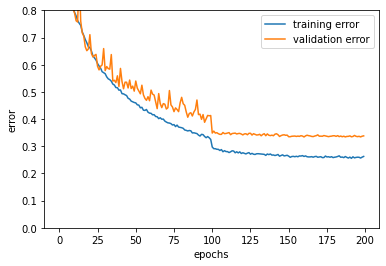

In [4]:
import matplotlib.pyplot as plt
plt.plot(1-log[1],label='training error')
plt.plot(1-log[2],label='validation error')
plt.ylim(0,0.8)
plt.xlabel('epochs')
plt.ylabel('error')
plt.legend()